# 2025 COMP90042 Project
*Make sure you change the file name with your group id.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a.Data loading and structure analysis

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图样式
sns.set(style="whitegrid")

# ----------------------------
# Step 1: 加载 JSON 数据
# ----------------------------
with open('../../data/train-claims.json', 'r') as f:
    train_data = json.load(f)

with open('../../data/dev-claims.json', 'r') as f:
    dev_data = json.load(f)

with open('../../data/test-claims-unlabelled.json', 'r') as f:
    test_data = json.load(f)

with open('../../data/evidence.json', 'r') as f:
    evidence_data = json.load(f)

# ----------------------------
# Step 2: 构造统一结构的 DataFrame
# ----------------------------
def json_to_df(data_dict, data_type):
    records = []
    for claim_id, item in data_dict.items():
        record = {
            'id': claim_id,
            'claim_text': item.get('claim_text', ''),
            'claim_label': item.get('claim_label', None),
            'evidences': item.get('evidences', []),
            'data_type': data_type
        }
        records.append(record)
    return pd.DataFrame(records)

df_train = json_to_df(train_data, "train")
df_dev = json_to_df(dev_data, "dev")
df_test = json_to_df(test_data, "test")  # test 无 label 和 evidences

# 合并数据
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# 动态添加统计列
df_all['text_len'] = df_all['claim_text'].str.split().apply(len)
df_all['num_evidence'] = df_all['evidences'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_all

,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5
...,...,...,...,...,...,...,...
1530,claim-293,When the measuring equipment gets old and need...,None,[],test,13,0
1531,claim-910,"The cement, iron and steel, and petroleum refi...",None,[],test,20,0
1532,claim-2815,A new peer-reviewed study on Surface Warming a...,None,[],test,39,0
1533,claim-1652,The strong CO2 effect has been observed by man...,None,[],test,11,0


In [2]:
df_test

,id,claim_text,claim_label,evidences,data_type
0,claim-2967,The contribution of waste heat to the global c...,None,[],test
1,claim-979,“Warm weather worsened the most recent five-ye...,None,[],test
2,claim-1609,Greenland has only lost a tiny fraction of its...,None,[],test
3,claim-1020,“The global reef crisis does not necessarily m...,None,[],test
4,claim-2599,Small amounts of very active substances can ca...,None,[],test
...,...,...,...,...,...
148,claim-293,When the measuring equipment gets old and need...,None,[],test
149,claim-910,"The cement, iron and steel, and petroleum refi...",None,[],test
150,claim-2815,A new peer-reviewed study on Surface Warming a...,None,[],test
151,claim-1652,The strong CO2 effect has been observed by man...,None,[],test


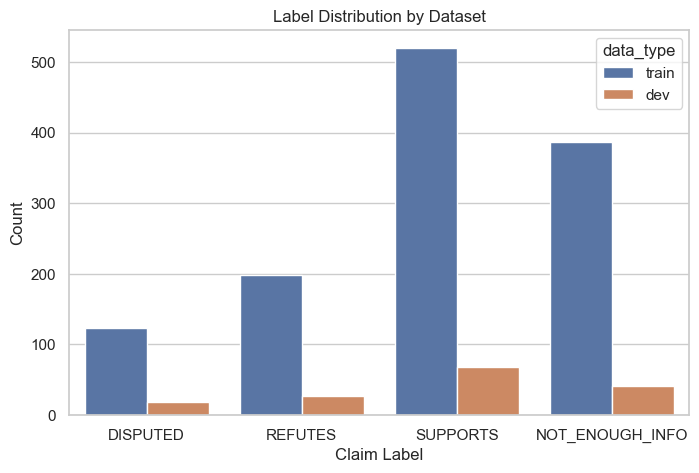

In [ ]:
# 1. 标签分布（整体）
plt.figure(figsize=(7, 5))
sns.countplot(data=df_all, x='claim_label')
plt.title('Overall Label Distribution')
plt.xlabel('Claim Label')
plt.ylabel('Count')
plt.show()

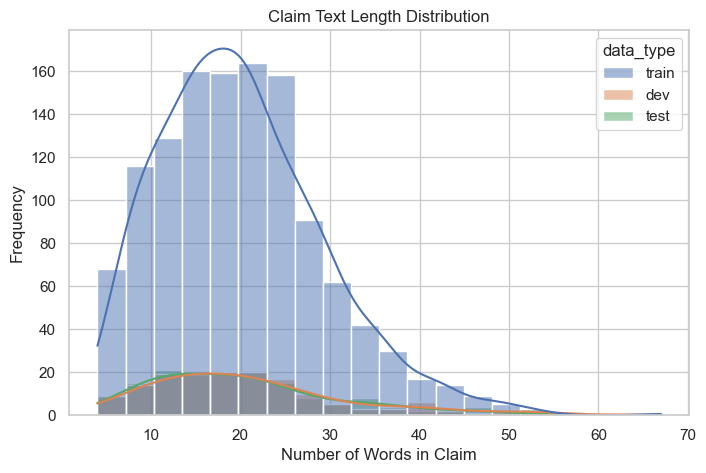

In [ ]:
# 2. Claim 文本长度分布
plt.figure(figsize=(7, 5))
sns.histplot(df_all['text_len'], bins=20, kde=True)
plt.title('Claim Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

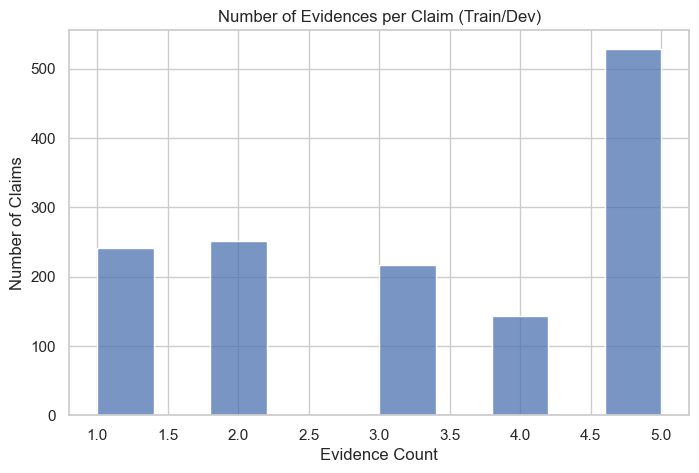

In [ ]:
# 3. Evidence 数量分布
plt.figure(figsize=(7, 5))
sns.histplot(df_all['num_evidence'], bins=10)
plt.title('Number of Evidences per Claim')
plt.xlabel('Evidence Count')
plt.ylabel('Number of Claims')
plt.show()

# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*